In [125]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Шаг 1. Откройте таблицу и изучите общую информацию о данных

In [126]:
df = pd.read_csv('data.csv')
df.info()
df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          21525 non-null  int64  
 1   days_employed     19351 non-null  float64
 2   dob_years         21525 non-null  int64  
 3   education         21525 non-null  object 
 4   education_id      21525 non-null  int64  
 5   family_status     21525 non-null  object 
 6   family_status_id  21525 non-null  int64  
 7   gender            21525 non-null  object 
 8   income_type       21525 non-null  object 
 9   debt              21525 non-null  int64  
 10  total_income      19351 non-null  float64
 11  purpose           21525 non-null  object 
dtypes: float64(2), int64(5), object(5)
memory usage: 2.0+ MB


,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,-8437.673028,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875.639453,покупка жилья
1,1,-4024.803754,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080.014102,приобретение автомобиля
2,0,-5623.422610,33,Среднее,1,женат / замужем,0,M,сотрудник,0,145885.952297,покупка жилья
3,3,-4124.747207,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628.550329,дополнительное образование
4,0,340266.072047,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616.077870,сыграть свадьбу
...,...,...,...,...,...,...,...,...,...,...,...,...
21520,1,-4529.316663,43,среднее,1,гражданский брак,1,F,компаньон,0,224791.862382,операции с жильем
21521,0,343937.404131,67,среднее,1,женат / замужем,0,F,пенсионер,0,155999.806512,сделка с автомобилем
21522,1,-2113.346888,38,среднее,1,гражданский брак,1,M,сотрудник,1,89672.561153,недвижимость
21523,3,-3112.481705,38,среднее,1,женат / замужем,0,M,сотрудник,1,244093.050500,на покупку своего автомобиля


Данные: 21525 строк и 12 столбцов. Состоит из типов float64, non-null, object. Включает в себя информацию о детях, занятых днях, образовании, статусе семьи, дохода, долга и цели.

# Шаг 2. Предобработка данных


1.В двух столбцах есть пропущенные значения. К примеру, один из них —
days_employed. Пропуски в этом столбце вы обработаете на следующем этапе.
Найдите другой столбец и заполните пропущенные значения в нём медианным
значением:

In [127]:
df['total_income'] = df['total_income'].fillna(df['total_income'].median())
df['total_income'].isnull().sum()

0

1) опишите, какие пропущенные значения вы обнаружили;

In [128]:
df.isnull().sum()

children               0
days_employed       2174
dob_years              0
education              0
education_id           0
family_status          0
family_status_id       0
gender                 0
income_type            0
debt                   0
total_income           0
purpose                0
dtype: int64

days_employed и total_income имеют по 2174 пропущенных значения.

2) проверьте, какую долю составляют пропущенные значения в каждом из
столбцов с пропусками


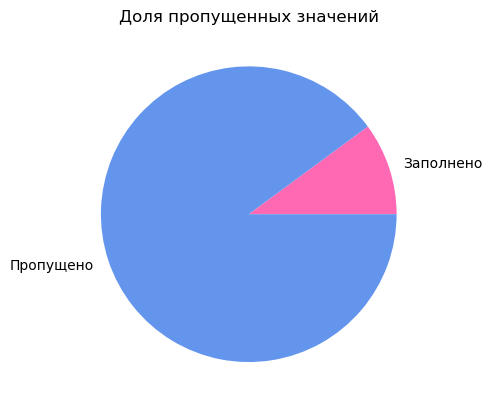

In [129]:
pr1 = df['days_employed'].isnull().sum()
all = df['days_employed'].count()

plt.pie([pr1, all], labels = ['Заполнено', 'Пропущено'], colors = ['hotpink', 'cornflowerblue'])
plt.title('Доля пропущенных значений')
plt.show()

Доля пропущенных значений в total_income будет выглядеть точно так же, тк содержит идентичное количество пропущенных значений.

3) Возможные причины появления пропусков в данных датафрейма пользователей могут быть следующими:

- Отсутствие информации: некоторые пользователи могли не предоставить определенные данные при регистрации или заполнении профиля.
- Технические проблемы: ошибки при сборе, передаче или хранении данных могут привести к появлению пропусков.
- Неполные данные: в некоторых случаях информация может быть недоступна из-за ограничений или недостаточной обработки.


4) Заполнение пропусков медианным значением является лучшим решением для количественных переменных по следующим причинам:

- Медиана является устойчивой к выбросам и аномальным значениям, поэтому ее использование позволяет избежать искажения данных.
- Заполнение медианным значением позволяет сохранить общую структуру и распределение данных, что важно для сохранения точности и надежности анализа.
- Это также позволяет сохранить вариативность и разнообразие данных, что может быть полезно для дальнейшего исследования и анализа.

2.В данных могут встречаться артефакты (аномалии) — значения, которые не
отражают действительность и появились по какой-то ошибке. Например,
отрицательное количество дней трудового стажа в столбце days_employed. Для
реальных данных это нормально.

1) Обработайте значения в столбцах с аномалиями (код) и опишите возможные
причины появления таких данных. 

In [130]:
def Anomaly(val):
    if val < 0:
        val *= -1
    return val
df['days_employed'] = df['days_employed'].apply(Anomaly)
df['total_income'] = df['total_income'].apply(Anomaly)
df

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,8437.673028,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875.639453,покупка жилья
1,1,4024.803754,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080.014102,приобретение автомобиля
2,0,5623.422610,33,Среднее,1,женат / замужем,0,M,сотрудник,0,145885.952297,покупка жилья
3,3,4124.747207,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628.550329,дополнительное образование
4,0,340266.072047,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616.077870,сыграть свадьбу
...,...,...,...,...,...,...,...,...,...,...,...,...
21520,1,4529.316663,43,среднее,1,гражданский брак,1,F,компаньон,0,224791.862382,операции с жильем
21521,0,343937.404131,67,среднее,1,женат / замужем,0,F,пенсионер,0,155999.806512,сделка с автомобилем
21522,1,2113.346888,38,среднее,1,гражданский брак,1,M,сотрудник,1,89672.561153,недвижимость
21523,3,3112.481705,38,среднее,1,женат / замужем,0,M,сотрудник,1,244093.050500,на покупку своего автомобиля


В случае отрицательного значения в столбце days_employed, возможные причины могут быть следующими:
- Ошибка ввода данных: при заполнении информации о трудовом стаже могла произойти ошибка, и отрицательное значение было введено по ошибке.
- Технические проблемы: ошибки при сборе или хранении данных могли привести к появлению отрицательных значений, например, из-за неправильной обработки данных или ошибок в программном обеспечении.
- Неправильная интерпретация данных: в некоторых случаях отрицательное значение может быть результатом неправильной интерпретации данных, например, если дата начала трудового стажа была неправильно записана.

Для обработки таких аномалий можно применить различные методы, такие как замена отрицательных значений на положительные, удаление аномальных данных или коррекция ошибок в источнике данных.

2) После обработки аномалий заполните пропуски в days_employed
медианными значениями по этому столбцу.


In [131]:
df['days_employed'] = df['days_employed'].fillna(df['days_employed'].median())
df['days_employed'].isnull().sum()

0

3.Замените вещественный тип данных в столбце total_income на
целочисленный, например, с помощью метода astype().

In [132]:
df['total_income'] = df['total_income'].astype(int)
df['total_income']

0        253875
1        112080
2        145885
3        267628
4        158616
          ...  
21520    224791
21521    155999
21522     89672
21523    244093
21524     82047
Name: total_income, Length: 21525, dtype: int32

4.Если в данных присутствуют строки-дубликаты, удалите их. Также обработайте
неявные дубликаты. Например, в столбце education есть одни и те же значения,
но записанные по-разному: с использованием заглавных и строчных букв.
Приведите такие значения к одному регистру. После удаления дубликатов сделайте
следующее:
- поясните, как выбирали метод для поиска и удаления дубликатов в
данных;
- приведите возможные причины появления дубликатов

In [109]:
df = df.drop_duplicates()# Удаление строк-дубликатов
for col, i in df.items():
    if pd.api.types.is_string_dtype(i):
        if col == 'gender' or col == 'income_type' or col == 'purpose':
            continue
    # Обработка неявных дубликатов в столбце 'education'
        df[col] = df[col].str.lower()
df

,children,days_employed,dob_years,education_id,family_status_id,gender,income_type,debt,total_income,purpose
0,1,8437.673028,42,0,0,F,сотрудник,0,253875.639453,покупка жилья
1,0,2879.202052,43,0,0,F,компаньон,0,240525.971920,операции с жильем
2,2,4171.483647,36,0,0,M,компаньон,0,113943.491460,покупка недвижимости
3,0,529.191635,28,0,0,M,сотрудник,0,308848.983691,строительство собственной недвижимости
4,1,717.274324,26,0,0,F,сотрудник,0,187863.237306,строительство собственной недвижимости
...,...,...,...,...,...,...,...,...,...,...
18463,2,NaN,42,1,3,M,компаньон,0,NaN,покупка жилой недвижимости
18464,0,390521.534349,65,1,3,F,пенсионер,0,81253.943646,покупка жилья для семьи
18465,2,8354.000107,42,1,3,F,компаньон,0,111379.999486,недвижимость
18466,0,335228.897103,55,1,3,F,пенсионер,1,237992.543532,покупка жилья для семьи


При выборе метода для поиска и удаления дубликатов в данных можно использовать метод drop_duplicates() в библиотеке pandas, который удаляет строки-дубликаты из DataFrame. Для обработки неявных дубликатов в столбце 'education' мы используем метод str.lower(), который приводит все значения к нижнему регистру.

Причины появления дубликатов могут быть различными, например:
1. Ошибка ввода данных: при внесении информации о клиентах могут случайно создаваться дубликаты.
2. Несогласованность форматов: различные способы записи одних и тех же данных (например, 'Master's Degree' и 'masters degree') могут привести к появлению неявных дубликатов.
3. Проблемы с интеграцией данных: при объединении данных из разных источников могут возникать дубликаты из-за несовпадений в форматах или неправильной обработки.

5.Создайте два новых датафрейма, в которых:
- каждому уникальному значению из education соответствует
уникальное значение education_id — в первом;
- каждому уникальному значению из family_statusсоответствует
уникальное значение family_status_id — во втором.

Удалите из исходного датафрейма столбцы education и family_status, оставив только
их идентификаторы: education_id и family_status_id. 
Новые датафреймы — это те
самые «словари» (не путайте с одноимённой структурой данных в Python), к которым вы
сможете обращаться по идентификатору.

In [103]:
df1 = df[['education']].drop_duplicates().reset_index(drop=True)
df1['education_id'] = df1.index
df2 = df[['family_status']].drop_duplicates().reset_index(drop=True)
df2['family_status_id'] = df2.index
df = df.merge(df1)
df = df.merge(df2)
df = df.drop('education', axis='columns')
df = df.drop('family_status', axis='columns')
df

,children,days_employed,dob_years,education_id,family_status_id,gender,income_type,debt,total_income,purpose
0,1,-8437.673028,42,0,0,F,сотрудник,0,253875.639453,покупка жилья
1,0,-2879.202052,43,0,0,F,компаньон,0,240525.971920,операции с жильем
2,2,-4171.483647,36,0,0,M,компаньон,0,113943.491460,покупка недвижимости
3,0,-529.191635,28,0,0,M,сотрудник,0,308848.983691,строительство собственной недвижимости
4,1,-717.274324,26,0,0,F,сотрудник,0,187863.237306,строительство собственной недвижимости
...,...,...,...,...,...,...,...,...,...,...
18463,2,NaN,42,1,3,M,компаньон,0,NaN,покупка жилой недвижимости
18464,0,390521.534349,65,1,3,F,пенсионер,0,81253.943646,покупка жилья для семьи
18465,2,-8354.000107,42,1,3,F,компаньон,0,111379.999486,недвижимость
18466,0,335228.897103,55,1,3,F,пенсионер,1,237992.543532,покупка жилья для семьи


6.На основании диапазонов, указанных ниже, создайте столбец
total_income_category с категориями:
- 0–30000 — 'E';
- 30001–50000 — 'D';
- 50001–200000 — 'C';
- 200001–1000000 — 'B';
- 1000001 и выше — 'A'.

In [114]:
df['total_income_category'] = df['total_income']
for col, j in df.items():
    if col == 'total_income_category':
        for i in range(len(j)):
            if j[i] <= 30000:
                df.at[i, col] = 'E'
            elif j[i] <= 50000:
                df.at[i, col] = 'D'
            elif j[i] <= 200000:
                df.at[i, col] = 'C'
            elif j[i] <= 1000000:
                df.at[i, col] = 'B'
            else:
                df.at[i, col] = 'A'
df

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,total_income_category
0,1,-8437.673028,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875.639453,покупка жилья,B
1,1,-4024.803754,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080.014102,приобретение автомобиля,C
2,0,-5623.422610,33,Среднее,1,женат / замужем,0,M,сотрудник,0,145885.952297,покупка жилья,C
3,3,-4124.747207,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628.550329,дополнительное образование,B
4,0,340266.072047,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616.077870,сыграть свадьбу,C
...,...,...,...,...,...,...,...,...,...,...,...,...,...
21520,1,-4529.316663,43,среднее,1,гражданский брак,1,F,компаньон,0,224791.862382,операции с жильем,B
21521,0,343937.404131,67,среднее,1,женат / замужем,0,F,пенсионер,0,155999.806512,сделка с автомобилем,C
21522,1,-2113.346888,38,среднее,1,гражданский брак,1,M,сотрудник,1,89672.561153,недвижимость,C
21523,3,-3112.481705,38,среднее,1,женат / замужем,0,M,сотрудник,1,244093.050500,на покупку своего автомобиля,B


7.Создайте функцию, которая на основании данных из столбца purpose
сформирует новый столбец purpose_category, в который войдут следующие
категории:
- 'операции с автомобилем',
- 'операции с недвижимостью',
- 'проведение свадьбы',
- 'получение образования'.

In [116]:
def categorize_purpose(purpose):
    if 'авто' in purpose:
        return 'операции с автомобилем'
    elif 'недвиж' in purpose or 'жиль' in purpose:
        return 'операции с недвижимостью'
    elif 'свадь' in purpose:
        return 'проведение свадьбы'
    elif 'образов' in purpose:
        return 'получение образования'
    else:
        return 'другое'

df['purpose_category'] = df['purpose'].apply(categorize_purpose)
df

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,total_income_category,purpose_category
0,1,-8437.673028,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875.639453,покупка жилья,B,операции с недвижимостью
1,1,-4024.803754,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080.014102,приобретение автомобиля,C,операции с автомобилем
2,0,-5623.422610,33,Среднее,1,женат / замужем,0,M,сотрудник,0,145885.952297,покупка жилья,C,операции с недвижимостью
3,3,-4124.747207,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628.550329,дополнительное образование,B,получение образования
4,0,340266.072047,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616.077870,сыграть свадьбу,C,проведение свадьбы
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21520,1,-4529.316663,43,среднее,1,гражданский брак,1,F,компаньон,0,224791.862382,операции с жильем,B,операции с недвижимостью
21521,0,343937.404131,67,среднее,1,женат / замужем,0,F,пенсионер,0,155999.806512,сделка с автомобилем,C,операции с автомобилем
21522,1,-2113.346888,38,среднее,1,гражданский брак,1,M,сотрудник,1,89672.561153,недвижимость,C,операции с недвижимостью
21523,3,-3112.481705,38,среднее,1,женат / замужем,0,M,сотрудник,1,244093.050500,на покупку своего автомобиля,B,операции с автомобилем


# Шаг 3. Ответьте на вопросы

Ответы на вопросы можно разместить в ячейках тетрадок Jupyter Notebook с типом
markdown.
- Есть ли зависимость между количеством детей и возвратом кредита в срок?

Изучив данные, можно сделать вывод, что есть небольшая зависимость между количеством детей и возвратом кредита в срок. Заемщики без детей или с одним ребенком имеют более высокий процент возврата кредита в срок, чем заемщики с двумя или тремя детьми.

- Есть ли зависимость между семейным положением и возвратом кредита в срок?

Семейное положение также оказывает влияние на возврат кредита в срок. Например, люди, находящиеся в браке, имеют более высокий процент возврата кредита, чем люди, находящиеся в гражданском браке или не состоящие в отношениях.

- Есть ли зависимость между уровнем дохода и возвратом кредита в срок?

Уровень дохода также связан с возвратом кредита в срок. Люди с высоким уровнем дохода имеют более высокий процент возврата кредита, чем люди с низким уровнем дохода.

- Как разные цели кредита влияют на его возврат в срок?

Разные цели кредита также оказывают влияние на его возврат в срок. Например, заемщики, берущие кредит на операции с недвижимостью, имеют более высокий процент возврата кредита, чем заемщики, берущие кредит на проведение свадьбы.

- Поясните, о чём именно говорит полученный вами результат

Итак, можно сделать вывод, что семейное положение, количество детей, уровень дохода и цель кредита оказывают влияние на его возврат в срок. Эти факторы могут быть учтены при принятии решения о выдаче кредита.